# Imports

In [82]:
import keras #High level interface of TensorFlow
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import InputLayer
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers.convolutional import *
import numpy as np 
import matplotlib.pyplot as plt
import tensorflowjs as tfjs
from PIL import Image
from keras.optimizers import RMSprop

# Image preprocessing

In [2]:
train_path='../dataset2/train'
valid_path='../dataset2/valid'

In [3]:
batch_size = 16 #Every batch contains data from 16 different images 
#Data Augmentation
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(200, 200),  
        batch_size=batch_size,)  
valid_set = train_datagen.flow_from_directory(
        valid_path,
        target_size=(200, 200),  
        batch_size=batch_size,)  


Found 1275 images belonging to 15 classes.
Found 499 images belonging to 15 classes.


# Creating a model

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200,200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #first block, frozen

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Flatten()) #Stream data to "nodes" of the ANN
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25)) #Dropping out some data
model.add(Dense(15))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
__________

In [5]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Training

In [6]:
model.fit_generator(train_set,
                    steps_per_epoch = 1275//16, #1000/16 numbers of batches per epoch
                    epochs = 25,
                    validation_data = valid_set,
                    validation_steps = 499//16 )
                   
        
                 

Epoch 1/25
79/79 [==============================] - 104s 1s/step - loss: 2.4021 - acc: 0.3370 - val_loss: 2.5721 - val_acc: 0.1714
Epoch 2/25
79/79 [==============================] - 100s 1s/step - loss: 1.9419 - acc: 0.4243 - val_loss: 2.1256 - val_acc: 0.3002
Epoch 3/25
79/79 [==============================] - 102s 1s/step - loss: 1.7374 - acc: 0.4670 - val_loss: 2.6593 - val_acc: 0.1843
Epoch 4/25
79/79 [==============================] - 110s 1s/step - loss: 1.5627 - acc: 0.5204 - val_loss: 1.7924 - val_acc: 0.3975
Epoch 5/25
79/79 [==============================] - 112s 1s/step - loss: 1.4190 - acc: 0.5556 - val_loss: 1.6272 - val_acc: 0.4928
Epoch 6/25
79/79 [==============================] - 104s 1s/step - loss: 1.3196 - acc: 0.5872 - val_loss: 1.4501 - val_acc: 0.5404
Epoch 7/25
79/79 [==============================] - 101s 1s/step - loss: 1.2335 - acc: 0.6145 - val_loss: 1.3432 - val_acc: 0.5839
Epoch 8/25
79/79 [==============================] - 104s 1s/step - loss: 1.1057 - a

In [12]:
#model.save("models/model_200x200.h5")
tfjs.converters.save_keras_model(model, './models/model_2.json')
print("Saved")

Saved


In [32]:
valid_set.class_indices

{'Faces': 0,
 'accordion': 1,
 'barrel': 2,
 'binocular': 3,
 'buddha': 4,
 'butterfly': 5,
 'camera': 6,
 'cougar_body': 7,
 'cougar_face': 8,
 'crab': 9,
 'crayfish': 10,
 'crocodile': 11,
 'dalmatian': 12,
 'scissors': 13,
 'soccer_ball': 14}

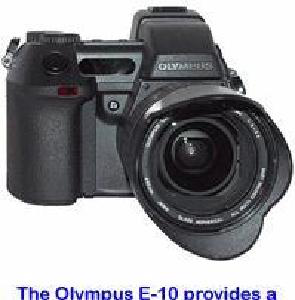

In [77]:
image = Image.open("PersonalTestSet/image_0014.jpg")
image

In [78]:
def preprocess_img(img,target_size):
    img = img.resize(target_size)
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    return img

In [79]:
preprocessed_image = preprocess_img(image,target_size=(200,200))

In [80]:
predictions = model.predict_proba(preprocessed_image)
predictions

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)